# 1. Metoda Gaussa-Jordana

In [58]:
import numpy as np
from math import inf
import time
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import networkx as nx
import random
import csv
from pyvis.network import Network

In [64]:
# rozwiązywanie układu równań metodą gaussa-jordana metodą partial pivotingu
def solve(A, b):
    n = len(A)
    for i in range(n):
        A[i].append(b[i])

    for i in range(n):
        pivot_index = get_pivot(A, i, i)
        if pivot_index != i and pivot_index != -inf:
            swap_rows(A, i, pivot_index)
        pivot = A[i][i]
        for j in range(i, n + 1):
            A[i][j] /= pivot
        for j in range(n):
            if i == j: continue
            pivot = A[j][i]
            for k in range(i, n + 1):
                A[j][k] -= pivot * A[i][k]

    res = []
    for i in range(n):
        res.append(A[i][n])

    return res


# return the index of the pivot row
def get_pivot(A, start_row, col):
    n = len(A)
    max_val = -inf
    max_idx = -inf
    for i in range(start_row, n):
        if abs(A[i][col]) > max_val:
            max_val = abs(A[i][col])
            max_idx = i
    return max_idx


def swap_rows(A, i, j):
    A[i], A[j] = A[j], A[i]

### Porównanie implementacji numpy i mojej własnej

In [9]:
numpy_times = []
my_implementation_times = []
size = []

for n in range(500, 1001, 50):
    size.append(n)
    A = [list(np.random.uniform(-10e10, 10e10, n)) for _ in range(n)]
    A_copy = [row.copy() for row in A]
    b = np.random.uniform(-10e10, 10e10, n)
    start_time = time.time()
    my_res = solve(A, b)
    my_time = time.time() - start_time

    start_time = time.time()
    np_res = np.linalg.solve(A_copy, b)
    np_time = time.time() - start_time

    numpy_times.append(np_time)
    my_implementation_times.append(my_time)

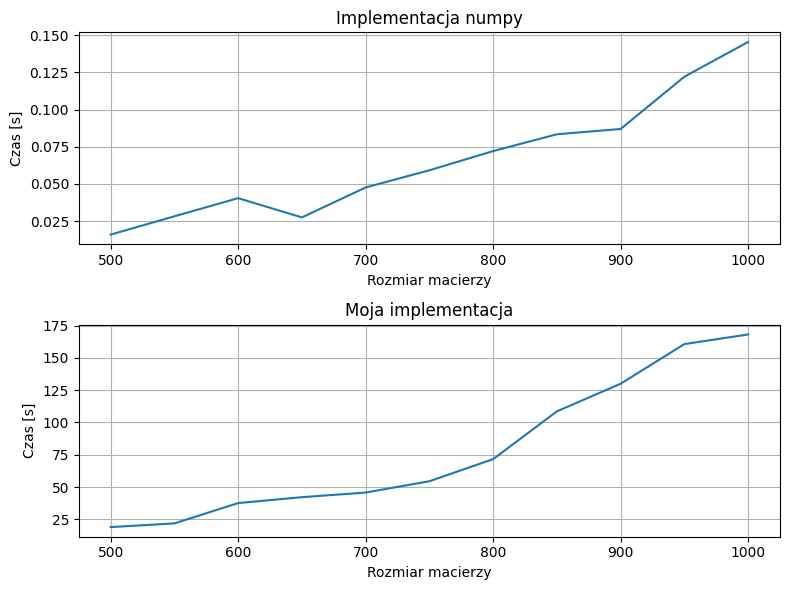

In [10]:
fig, axs = plt.subplots(2, 1, figsize=(8, 6))

axs[0].plot(size, numpy_times)
axs[0].set_xlabel("Rozmiar macierzy")
axs[0].set_ylabel("Czas [s]")
axs[0].set_title("Implementacja numpy")
axs[0].grid(True)

axs[1].plot(size, my_implementation_times)
axs[1].set_xlabel("Rozmiar macierzy")
axs[1].set_ylabel("Czas [s]")
axs[1].set_title("Moja implementacja")
axs[1].grid(True)

plt.tight_layout()
plt.show()

Jak łatwo żauważyć moja implementacja jest o wiele rzędów wielkości gorsza od realizacji numpy prawopodobnie z tego powodu, że numpy jest napisane w C oraz jest zoptymalizowane pod kątem wydajności.

# 2. Faktoryzacja LU

In [11]:
def LU(A):
    n = len(A)
    for i in range(n):
        for j in range(i + 1, n):
            factor = A[j][i] / A[i][i]
            for k in range(i, n):
                A[j][k] -= factor * A[i][k]
            A[j][i] = factor
    return A

In [32]:
A = [[np.random.uniform(-1e6, 1e6) for _ in range(5)] for _ in range(5)]
n = len(A)
A_copy = np.array([row[:] for row in A])
LU(A)
print("A", *A, sep="\n")
U = [[A[j][i] if i >= j else 0 for i in range(n)] for j in range(n)]
print("U", *U, sep="\n")
L = [[A[j][i] if i < j else 1 if i == j else 0 for i in range(n)] for j in range(n)]
print("L", *L, sep="\n")
np_A = np.array(np.dot(L, U))
print("norm", np.linalg.norm(np_A - A_copy))

A
[-802051.1709139717, -701679.7946743802, -15742.211659090011, 572703.2308666715, -353188.1819709552]
[0.37459062840257373, -229564.0210481643, 385415.7827819993, 190190.6328817867, 455654.9973804809]
[0.40521791080675235, -3.9354681473370854, 971256.981934754, 939812.2475358194, 2795492.568726152]
[-0.023655330654999782, 0.5288940406959048, 0.030417453953963065, 773911.7733846119, 71367.67044615567]
[0.2976077245287848, -3.679142230214001, 1.5282534013180489, -0.7070731163270675, -3203028.178528188]
U
[-802051.1709139717, -701679.7946743802, -15742.211659090011, 572703.2308666715, -353188.1819709552]
[0, -229564.0210481643, 385415.7827819993, 190190.6328817867, 455654.9973804809]
[0, 0, 971256.981934754, 939812.2475358194, 2795492.568726152]
[0, 0, 0, 773911.7733846119, 71367.67044615567]
[0, 0, 0, 0, -3203028.178528188]
L
[1, 0, 0, 0, 0]
[0.37459062840257373, 1, 0, 0, 0]
[0.40521791080675235, -3.9354681473370854, 1, 0, 0]
[-0.023655330654999782, 0.5288940406959048, 0.030417453953963

# 3. Analiza obwodu elektrycznego - nadokreślony układ równań


In [66]:
def generate_bridge_graph(n, p):
    G1, _ = generate_erdos_graph(n // 2 - 1, p)
    G2, _ = generate_erdos_graph(n // 2, p)
    G = nx.disjoint_union(G1, G2)
    len1 = len(G1.nodes())
    len2 = len(G2.nodes())
    while True:
        u1, u2 = random.choice(range(0, len1)), random.choice(range(0, len1))
        v1, v2 = random.choice(range(len1, len1 + len2)), random.choice(range(len1, len1 + len2))
        if v1 == v2 or u1 == u2: continue
        else: break
    G.add_edge(u1, v1, resistance=int(np.random.uniform(10, 100)))
    G.add_edge(u2, v2, resistance=int(np.random.uniform(10, 100)))
    pos = nx.kamada_kawai_layout(G)
    return G, pos

In [67]:
def generate_erdos_graph(n, p):
    while True:
        G = nx.erdos_renyi_graph(n, p)
        if nx.is_connected(G) and all(d > 1 for _, d in G.degree()): break
    for u, v in G.edges():
        G[u][v]["resistance"] = int(np.random.uniform(1, 10))
    pos = nx.kamada_kawai_layout(G)
    return G, pos

In [68]:
def generate_3regular_graph(n):
    while True:
        G = nx.random_regular_graph(3, n)
        if nx.is_connected(G): break
    for u, v in G.edges():
        G[u][v]["resistance"] = int(np.random.uniform(1, 10))
    pos = nx.kamada_kawai_layout(G)
    return G, pos

In [69]:
def generate_grid_graph(n, m):
    G = nx.grid_2d_graph(m, n)
    G = nx.convert_node_labels_to_integers(G)
    for u, v in G.edges():
        G[u][v]["resistance"] = int(np.random.uniform(1, 10))
    pos = {node: (node % n, (m - 1) - (node // n)) for node in G.nodes()}
    return G, pos

In [70]:
def generate_small_world_graph(n, k, p):
    while True:
        G = nx.watts_strogatz_graph(n, k, p)
        if nx.is_connected(G) and all(d > 1 for _, d in G.degree()): break
    for u, v in G.edges():
        G[u][v]["resistance"] = int(np.random.uniform(1, 10))
    pos = nx.spring_layout(G)
    return G, pos

In [71]:
def load_graph_from_file(filename):
    G = nx.Graph()
    # First row must be electromotive force
    with open(filename, "r") as f:
        csv_reader = csv.reader(f)
        emf_row = next(csv_reader)
        s, t, E = [int(x) for x in emf_row]
        for row in csv_reader:
            u, v, resistance = [int(x) for x in row]
            G.add_edge(u, v, resistance=resistance)
    if not nx.is_connected(G) or any(d == 1 for _, d in G.degree()):
        raise ValueError("Graph is not connected")
    pos = nx.kamada_kawai_layout(G)
    return G, pos, (s, t, E)

In [72]:
# This method modifies the graph passed as G
def kirchhoff(G, s, t, E):
    # G = G.copy()
    s, t = min(s, t), max(s, t) # ensure s < t
    G.add_edge(s, t, resistance=0)
    edges = list(G.edges())
    edges_len = len(G.edges())
    nodes_len = G.number_of_nodes()
    A = [[0] * edges_len for _ in range(edges_len)]
    b = [0] * edges_len
    row = 0
    # Kirchhoff 1st law
    # At first I assume that edge (u, v) has current flowing from u to v (it doesn't really matter because we can change the sign of the current later)

    for i in range(nodes_len):
        if i == t: continue # One equation is redundant
        for idx in range(edges_len):
            u, v = edges[idx]
            if u == i:
                A[row][idx] = 1
            elif v == i:
                A[row][idx] = -1
        row += 1

    # Kirchhoff 2nd law
    # I'm using networkx's solution for finding basis cycles in a graph
    for cycle in nx.cycle_basis(G)[:edges_len - row]:
        for i in range(len(cycle)):
            u, v = cycle[i], cycle[(i + 1) % len(cycle)]
            edge_index = edges.index((min(u, v), max(u, v)))
            resistance = G[min(u, v)][max(u, v)]["resistance"]
            if (s, t) == (min(u, v), max(u, v)) and u < v:
                b[row] = -E
            elif (s, t) == (min(u, v), max(u, v)):
                b[row] = E
            else:
                if u < v:
                    A[row][edge_index] = -resistance
                else:
                    A[row][edge_index] = resistance
        row += 1
    return solve(A, b)

In [73]:
# This method modifies the graph passed as G
def node_voltage_method(G, s, t, E):
    # G = G.copy()
    s, t = min(s, t), max(s, t) # ensure s < t
    M = [[0 for _ in range(G.number_of_nodes())] for _ in range(G.number_of_nodes())]
    b = [0 for _ in range(G.number_of_nodes())]
    i = 0
    G.add_edge(s, t, resistance=0)
    edges = set(G.edges())
    for u in G.nodes():
        if u == s:
            M[i][u] = 1
        elif u == t:
            M[i][u] = 1
            b[i] = E
        else:
            for x, y in G.edges(u):
                x, y = min(x, y), max(x, y)
                if (x, y) in edges:
                    if x < u: # the current flows from x to u
                        M[i][x] += 1 / G[x][y]["resistance"]
                        M[i][y] += -1 / G[x][y]["resistance"]
                    else:
                        M[i][x] -= 1 / G[x][y]["resistance"]
                        M[i][y] -= -1 / G[x][y]["resistance"]
        i += 1
    res = solve(M, b)
    currents = []
    battery_index = None
    for i, (u, v) in enumerate(G.edges()):
        if (u, v) == (s,t):
            currents.append(None)
            battery_index = i
        else:
            currents.append((res[u] - res[v]) / G[u][v]["resistance"])
    # Idk if this is how it should be really calculated but it works
    in_currents = 0
    for i, (u, v) in enumerate(G.edges()):
        if i == battery_index: continue
        if v == s or (u == s and currents[i] < 0):
            in_currents += abs(currents[i])
    currents[battery_index] = in_currents
    return currents

In [74]:
# Use kirchhoff 1st law to check validity of the solution
def check_validity(G, I, eps=1e-9):
    edge_currents = {}
    for i, (u, v) in enumerate(G.edges()):
        edge_currents[(u, v)] = I[i]
    for u in G.nodes():
        currents_sum = 0
        for edge in G.edges(u):
            x, y = min(edge), max(edge)
            if (x, y) in edge_currents and x == u:
                currents_sum += edge_currents[(x, y)]
            elif (x, y) in edge_currents and y == u:
                currents_sum -= edge_currents[(x, y)]
        if currents_sum > eps: raise ValueError("Your algorithm sucks")
    return True

In [75]:
def create_resulting_graph(G, I, s, t):
    res_G = nx.DiGraph()
    for i, (u, v) in enumerate(G.edges()):
        resistance = G[u][v]["resistance"]
        if (s, t) == (u, v):
            resistance = 0
        if I[i] > 0:
            res_G.add_edge(u, v, current=I[i], resistance=resistance)
        else:
            res_G.add_edge(v, u, current=-I[i], resistance=resistance)
    return res_G

In [76]:
# OBSOLETE

# def visualize(G, pos, I, title="Graf"):
#     plt.figure(figsize=(16, 8))
#     edges = list(G.edges())
#     edges_len = len(edges)
#     res_G = nx.DiGraph()
#     currents_labels = {}
#     for i in range(edges_len):
#         u, v = edges[i]
#         if I[i] > 0:
#             res_G.add_edge(u, v, current=I[i])
#             currents_labels[(u, v)] = I[i]
#         else:
#             res_G.add_edge(v, u, current=-I[i])
#             currents_labels[(v, u)] = -I[i]
#     norm = mcolors.Normalize(vmin=min(currents_labels.values()), vmax=max(currents_labels.values()))
#     cmap = plt.cm.plasma
#     edge_colors = {edge: cmap(norm(float(current))) for edge, current in currents_labels.items()}
#     edge_colors = [edge_colors[edge] for edge in res_G.edges()]
#
#     nx.draw(res_G,
#             pos,
#             with_labels=True,
#             edge_color=edge_colors,
#             node_size=300,
#             width=2,
#             arrowsize=15,
#             arrowstyle="->,head_width=0.6,head_length=0.6",
#             )
#     if len(res_G.edges()) < 40:
#         edge_labels = {edge: f"{G[min(edge)][max(edge)]["resistance"]} Ω {currents_labels[edge]:.2f} A" for edge in
#                        res_G.edges()}
#         nx.draw_networkx_edge_labels(res_G, pos, edge_labels=edge_labels, font_size=12, alpha=0.5)
#     plt.title(title)
#     print(res_G)
#     plt.show()
#
#
# # G, pos = generate_erdos_graph(15,0.25)
# # G, pos = load_graph_from_file("graph.csv")
# # G, pos = generate_erdos_graph(50, 0.1)
# # G, pos = generate_3regular_graph(15)
# G,pos = generate_bridge_graph(20)
# # G, pos = generate_grid_graph(7, 3)
# u, v = random.choice(list(G.edges()))
# # I = kirchhoff(G, u, v, 50)
# I = node_voltage_method(G, u, v, 5000)
# visualize(G, pos, I)

In [77]:
def visualize_pyvis(G, pos, output_file, scale_factor=500, hide_nodes=False):
    currents = [d['current'] for _, _, d in G.edges(data=True)]
    cmap = plt.cm.plasma
    norm = mcolors.Normalize(vmin=min(currents), vmax=max(currents))

    nt = Network(
        height="1200px",
        width="1920px",
        directed=True,
        notebook=True,
        bgcolor="#4C585B",
        font_color="#000"
    )

    for node in G.nodes(data=True):
        label = "" if hide_nodes else str(node[0])
        color = "rgba(0,0,0,0)" if hide_nodes else "#fff"
        nt.add_node(
            node[0],
            x=pos[node[0]][0] * scale_factor,
            y=pos[node[0]][1] * scale_factor,
            label=label,
            color=color,
            physics=False
        )

    for edge in G.edges(data=True):
        u, v, d = edge
        label = f"SEM {d['current']:.2f} A" if d['resistance'] == 0 else f"{d['resistance']} Ω {d['current']:.2f} A"
        nt.add_edge(
            u, v,
            color=mcolors.to_hex(cmap(norm(d['current']))),
            label=label,
            arrows="to",
            smooth={"type": "straight"},
            physics=False
        )

    nt.set_options("""
    {
      "nodes": {
        "borderWidth": 2,
        "borderWidthSelected": 4,
        "font": {
        "align": "center",
          "vadjust": -37
        },
        "size": 20
      },
      "edges": {
        "color": {
          "inherit": false
        },
        "selectionWidth": 3
      },
      "interaction": {
        "hover": true,
        "tooltipDelay": 200
      }
    }
    """)

    nt.show(output_file)
    return nt

In [88]:
%%capture
erdos, pos_erdos = generate_erdos_graph(15, 0.1)
erdos_I = node_voltage_method(erdos, 0, 1, 50)
visualize_pyvis(create_resulting_graph(erdos, erdos_I, 0, 1), pos_erdos, "erdos.html", 500)
check_validity(erdos, erdos_I)

In [90]:
%%capture
s, t, E = 0, 1, 5000
bridge, pos_bridge = generate_bridge_graph(50, 0.1)
bridge_I = node_voltage_method(bridge, s, t, E)
visualize_pyvis(create_resulting_graph(bridge, bridge_I, s, t), pos_bridge, "bridge.html", 8000, hide_nodes=True)
check_validity(bridge, bridge_I)

In [125]:
%%capture
s, t, E = 12, 17, 15
grid, pos_grid = generate_grid_graph(5, 5)
grid_I = kirchhoff(grid, s, t, E)
visualize_pyvis(create_resulting_graph(grid, grid_I, s, t), pos_grid, "grid.html", 200)
check_validity(grid, grid_I)

In [126]:
%%capture
s, t, E = 35, 59, 15
reg3, pos_reg3 = generate_3regular_graph(100)
reg3_I = kirchhoff(reg3, s, t, E)
visualize_pyvis(create_resulting_graph(reg3, reg3_I, s, t), pos_reg3, "reg3.html", 4000, hide_nodes=True)
check_validity(reg3, reg3_I)

In [82]:
%%capture
s, t, E = 20, 21, 15
sm, pos_sm = generate_small_world_graph(100, 4, 0.2)
sm_I = kirchhoff(sm, s, t, E)
visualize_pyvis(create_resulting_graph(sm, sm_I, s, t), pos_sm, "small_world.html", 4000, hide_nodes=True)
check_validity(sm, sm_I)

In [83]:
%%capture
loaded_graph, pos_loaded_graph, (s, t, E) = load_graph_from_file("graph.csv")
loaded_graph_I = kirchhoff(loaded_graph, s, t, E)
visualize_pyvis(create_resulting_graph(loaded_graph, loaded_graph_I, s, t), pos_loaded_graph, "loaded_graph.html", 300)
check_validity(loaded_graph, loaded_graph_I)

## Wnioski
Rozwiązałem problem przy pomocy zarówno praw kirchhoffa jak i metody potencjałów węzłowych i dochodze do fundamentalnej konkluzji, że metoda potencjałów węzłowych jest bardziej elegancka jeśli chodzi o generowanie macierzy kwadratowej, lecz musimy z tego powodu po wyliczeniu napięć w każdym węźle dodatkowo obliczyć prąd przepływajacy przez SEM, natomiast w metodzie korzystającej z praw kirchhoffa dostajemy ten prąd od razu gdyż wyliczamy prąd płynący przez każdą krawędź lecz by utworzyc układ nieosobliwy musimy wykorzystać oba prawa oraz albo zaprzestać dodawania cykli do macierzy gdy osiągniemy odpowiednią ilość równań albo skorzystać z bardziej wyrafinowanych metod rozwiazywania macierzy nadokreślonych.

W moim rozwiązaniu kierunek prądu jest w obu metodach obrany jako z u do v gdy rozpatrujemy krawędź (u, v) przy czym krawędzie są zdefiniowane w taki sposób, że u < v (courtesy of networkx) natomiast po wyliczeniu natężeń, jeśli wynik jest ujemny oznacza to, że prąd w rzeczywistości płynie z v do u. Do znajdowania cykli prostych wykorzysuje funkcje biblioteczna networkx #cycle_basis, która wyszukuje cykle proste w następujący sposób:
- tworzy spanning tree (ST)
- następnie dla każdej krawędzi (u, v) nie będącej w ST szuka scieżki w ST od u do v i tworzy cykl poprzez dodanie do tej ścieżki krawędzi (u, v)

## Ważne informacje:
Wszystkie wygenerowane grafy znajdują się w plikach z rozszerzeniem .html dodatkowo można generować inne konfiguracje za pomocą ostatnich bloków w tym notebooku :).
